# 데이터 전처리 연습문제

In [1]:
# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 다운로드
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터 - 이진분류

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes : 목적변수
- Pclass - 티켓(선실) 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
data = pd.read_csv('data/titanic_train.csv')
data.set_index('PassengerId', inplace=True) # 인덱스를 PassengerId로 대체함
data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# 사본 사용
df = data.copy()

## 데이터 기본 정보
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

In [5]:
# (1) 데이터 기본 정보 확인
# 컬럼 이름, 컬럼수(특성 수), 샘플수(행수) 파악
# 카테고리형 타입(object)과 숫자형 타입(int, float) 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
# (2) 숫자형 데이터의 기본 통계값 확인 - object가 아닌 것들
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Figure size 1000x400 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

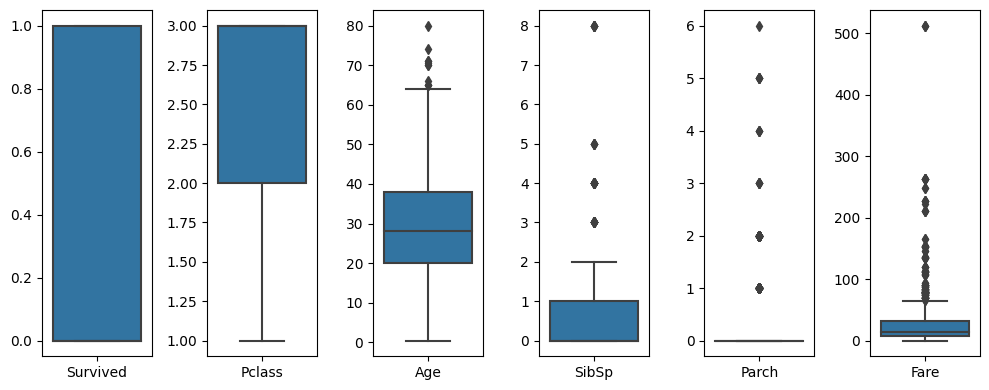

In [7]:
# (3) 박스 플롯으로 데이터의 전체적인 값의 범위 파악
plt.figure(figsize=(10, 4))
cols = df.describe().columns
for idx, col in enumerate(cols):
    plt.subplot(1, len(cols), idx+1)
    sns.boxplot(df[[col]])
plt.tight_layout()
plt.show()

In [8]:
# (4) 컬럼명 보기 - 복사해서 쓰기 편함
columns = df.columns
columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Figure size 600x400 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

<Axes: >

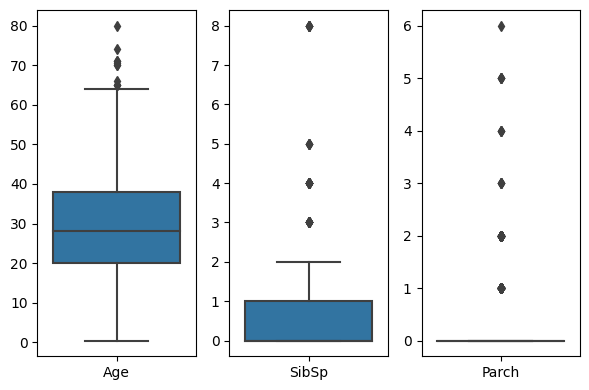

In [9]:
# (5) 특정 컬럼만 box plot으로 확인
# 나이, 동승한 형제/배우자, 부모/자녀 컬럼만 box plot으로 확인
# 'Age', 'SibSp','Parch'
plt.figure(figsize=(6, 4))
cols = ['Age', 'SibSp', 'Parch']
for idx, col in enumerate(cols):
    plt.subplot(1, len(cols), idx+1)
    sns.boxplot(df[[col]])
plt.tight_layout()
plt.show()

# 결측치 처리


In [10]:
# (6) 컬럼별 결측치 개수 확인
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# (7) 데이터프레임의 전체 크기(행수와 열수)확인
df.shape

(891, 11)

In [12]:
# (8) 특정 컬럼의 결측치 확인 및 제거
# Embarked 컬럼의 결측치 확인


# 항구 데이터(Embarked)는 결측치가 2개 뿐이고 
# 다른 값으로 대체하기가 어려우므로 샘플(행)을 삭제

# Embarked의 결측치인 행을 추출한 다음 인덱스를 추출, drop()메소드로 제거한다
df.drop(df[df['Embarked'].isna()].index, inplace=True)
df.shape
df.isna().sum()

(889, 11)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [13]:
# (9) 객실명 확인
# Cabin 칼럼의 결측치 확인 
df[df['Cabin'].isna()].head()

# Cabin 종류 확인 
df['Cabin'].value_counts().head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
Name: count, dtype: int64

In [14]:
# (10) 나이 컬럼의 결측치 확인
df[df['Age'].isna()].head()
df['Age'].isna().sum()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


177

<Axes: xlabel='Age', ylabel='Count'>

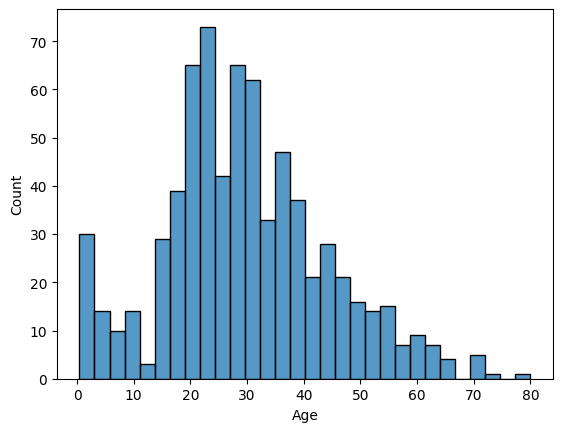

In [15]:
# (11) 히스토그램으로 나이 데이터 분포 확인 (구간:30)
sns.histplot(df['Age'], bins=30)

In [16]:
# (12) 나이 평균 확인
df['Age'].mean()

29.64209269662921

In [17]:
# (13) 결측치를 평균 나이로 대체 (데이터에 반영) 
# 좋은 방법은 아님(평균 나이 사람들만 나이를 미기재 하지는 않았을 것이므로)
# 지금은 결측치 대체 연습

# 결측치를 평균 나이로 대체
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 결측치 확인
df['Age'].isna().sum()

0

<Axes: xlabel='Age', ylabel='Count'>

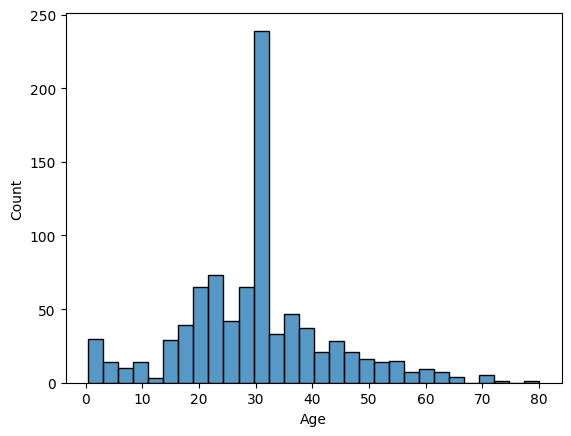

In [18]:
# 결측치를 평균값으로 대체한 후 나이 분포 확인
sns.histplot(df['Age'], bins=30)

## 카테고리 변수 변환

In [19]:
# (14) 선실 등급 확인 :  3가지 등급을 나타내는 카테고리 

# 범주형 변수 인코딩 (get_dummies() 사용)
# 원핫 인코딩 결과를 별도의 데이터프레임으로 저장
# class_df
# 컬럼명 : Class_1, Class_2, Class_3
# prefix="Class" 열 제목에 Class를 붙여서 작성할 것

class_df = pd.get_dummies(df['Pclass'], dtype=int, prefix='Class')
class_df

,Class_1,Class_2,Class_3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,1,0
888,1,0,0
889,0,0,1


In [20]:
# (15) 성별 범주형 변수도 원핫 인코딩 변환 

# 성별의 구성 확인
df['Sex'].value_counts()

# 원핫 인코딩 결과를 별도의 데이터프레임 저장
# sex_df
# 컬럼명 : Sex_female, Sex_male
sex_df = pd.get_dummies(df['Sex'], dtype=int, prefix='Sex')
sex_df

Sex
male      577
female    312
Name: count, dtype: int64

,Sex_female,Sex_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [21]:
# (16) 'Embarked' 항구명도 카테고리 변수이며 원핫 인코딩으로 변환


# 원핫 인코딩 후에 별도의 데이터프레임으로 생성
# embarked_df
# 컬럼명 : Embarked_C, Embarked_Q, Embarked_S
embarked_df = pd.get_dummies(df['Embarked'], dtype=int, prefix='Embarked')
embarked_df

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


## 수치형 데이터 

<Axes: xlabel='Fare', ylabel='Count'>

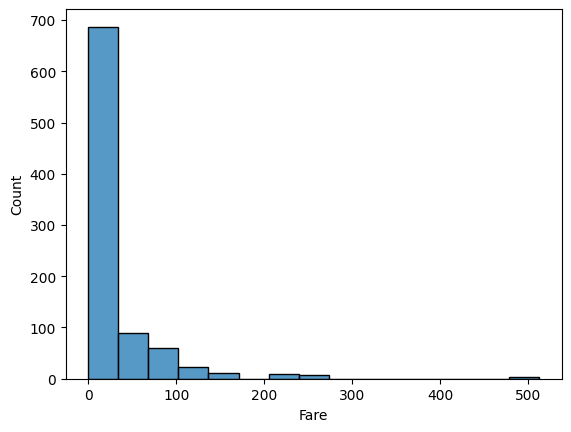

In [22]:
# (17) 'Fare' 요금 데이터 분포 확인하고 로그 변환
# 'Fare' 요금 데이터를 히스토그램으로 확인 (구간 수 : 15)
sns.histplot(df['Fare'], bins=15)

<Axes: xlabel='Fare', ylabel='Count'>

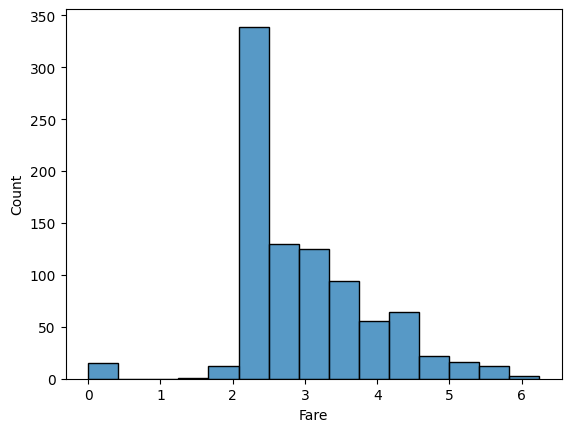

In [23]:
# 'Fare'요금 데이터 로그 변환 후 히스토그램으로 표시 
sns.histplot(np.log1p(df['Fare']), bins=15)

# 컬럼 취합
- 지금까지 전처리한 컬럼들을 모두 합침
- 기존 컬럼 + 로그변환 컬럼 + 원핫인코딩 변환 컬럼
- 'Age', 'SibSp', 'Parch', 'Fare', Embarked_C	Embarked_Q	Embarked_S	Class_1	Class_2	Class_3	Sex_female	Sex_male

In [24]:
# (18) 수치형 컬럼 먼저 선택
# final_df
# 선택 컬럼 : Age, SibSp, Parch
final_df = df[['Age', 'SibSp', 'Parch']]
final_df.head()

,Age,SibSp,Parch
PassengerId,,,
1,22.0,1,0
2,38.0,1,0
3,26.0,0,0
4,35.0,1,0
5,35.0,0,0


In [25]:
# 요금은 로그 변환한 값 사용해서 final_df에 Fare 컬럼 추가
# 'Age', 'SibSp', 'Parch', 'Fare'
final_df['Fare'] = np.log1p(df['Fare'])
final_df.head()

,Age,SibSp,Parch,Fare
PassengerId,,,,
1,22.0,1,0,2.110213
2,38.0,1,0,4.280593
3,26.0,0,0,2.188856
4,35.0,1,0,3.990834
5,35.0,0,0,2.202765


In [26]:
# 원핫 인코딩한 카테고리 변수 컬럼들을 가로로 붙임
# embarked_df, class_df, sex_df
# 'Age', 'SibSp', 'Parch', 'Fare', 
# Embarked_C Embarked_Q Embarked_S Class_1 Class_2 Class_3 Sex_female Sex_male
final_df = pd.concat([final_df, embarked_df, class_df, sex_df], axis=1)
final_df.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,22.0,1,0,2.110213,0,0,1,0,0,1,0,1
2,38.0,1,0,4.280593,1,0,0,1,0,0,1,0
3,26.0,0,0,2.188856,0,0,1,0,0,1,1,0
4,35.0,1,0,3.990834,0,0,1,1,0,0,1,0
5,35.0,0,0,2.202765,0,0,1,0,0,1,0,1


## 스케일링 

In [27]:
# (19) 표준 스케일링 적용
# 'Age', 'SibSp', 'Parch', 'Fare' 열에 표준 스케일링 적용 
from sklearn.preprocessing import StandardScaler
StdSc = StandardScaler()
final_df.loc[:, 'Age':'Fare'] = StdSc.fit_transform(final_df.loc[:, 'Age':'Fare'])
final_df.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,-0.589620,0.431350,-0.474326,-0.877591,0,0,1,0,0,1,0,1
2,0.644848,0.431350,-0.474326,1.366380,1,0,0,1,0,0,1,0
3,-0.281003,-0.475199,-0.474326,-0.796281,0,0,1,0,0,1,1,0
4,0.413385,0.431350,-0.474326,1.066796,0,0,1,1,0,0,1,0
5,0.413385,-0.475199,-0.474326,-0.781901,0,0,1,0,0,1,0,1
